In [1]:
# All the imports 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import re 
import itertools 

In [2]:

# with open('/home/neehaarika/Desktop/data/tunes.json') as json_data:
#     tuneData = json.load(json_data)
#     print(tuneData)
#
# print(len(tuneData))


tuneData = pd.read_json('/home/neehaarika/Desktop/data/tunes.json')
print(type(tuneData))

aliasData = pd.read_json('/home/neehaarika/Desktop/data/aliases.json')
print(type(aliasData))

recordData = pd.read_json('/home/neehaarika/Desktop/data/recordings.json')
print(type(recordData)) 

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [3]:
# All the initializations 
pd.set_option('display.max_colwidth', -1) 

import warnings
warnings.filterwarnings('ignore') 

In [4]:
tuneData.head(3)

,abc,date,meter,mode,name,setting,tune,type,username
0,dBB B2 A BAG|dBB Bcd efg|dBB B2 A BAG| eAA dBG A2 e| \r\ndBB B2 A BAG|dBB Bcd efg|dBB B2 A BAG| eAA dBG A2 A|\r\nBAB g2 e fed|BAB e/f/g e f2 A|BAB g2 e fed|eAA ABd e2 A|\r\nBAB g2 e fed|BAB e/f/g e f2 f|def gfe fed |eAA ABd efg|,2012-05-17 07:49:26,9/8,Gmajor,'G Iomain Nan Gamhna,11931,11931,slip jig,iliketurtles
1,|: G>A B>G c>A B>G | E<E A>G F<D D2 | G>A B>G c>A B>G | E>A F>D G2 G2 :|\r\n|: D>D D>D (3DDD D>D | d>B A>B G<E E2 | D>D D>D (3DDD D>D | d>B A>B G2 G2 :|,2016-03-31 15:34:45,4/4,Gmajor,'S Ann An Ìle,28560,15326,strathspey,Daniel Quayle
2,"uD2|:{F}v[G,2G2]uB>ud c>A B>G|{D}E2 uA>uG F<D D>F|{F}[G,2G2]uB>ud c>A B>G|[1E>A F<D {F}G2 uG>uD:|[2E>A F<D {F}G2 (G>E)|\r\nD>D D>B, D>D D>(B|d>B) A>B G<E E>G|D>D D>B, D>D D>(B|[1d>B) A<B {F}G2 G>E:|[2d>B) A<B {F}G2||",2016-04-03 09:15:08,4/4,Gmajor,'S Ann An Ìle,28582,15326,strathspey,DonaldK


In [5]:
numSettings = tuneData.groupby(['name', 'tune'])['abc'].count().reset_index().rename(index=str, columns={"tune": "tune_id"}) 

In [6]:
numSettings = numSettings.infer_objects() 
numSettings.dtypes 


name       object
tune_id    int64 
abc        int64 
dtype: object

In [7]:
numRecordings = recordData.groupby(['tune_id'])['id'].count().reset_index() 

In [8]:
numRecordings = numRecordings[numRecordings.tune_id.apply(lambda x: x.isnumeric())] 
numRecordings[['tune_id']] = numRecordings[['tune_id']].astype(int) 

In [9]:
numRecordings=numRecordings.loc[numRecordings['id'] < 250]
numRecordings.loc[numRecordings['tune_id'] == 15326]

,tune_id,id
3508,15326,1


In [10]:
numSettings.loc[numSettings['tune_id'] == 15326]

,name,tune_id,abc
1,'S Ann An Ìle,15326,2


In [11]:
joinData = numSettings.join(numRecordings.set_index('tune_id'), on='tune_id').dropna(how='any')  

In [13]:
joinData.loc[joinData['tune_id'] == 15326]

,name,tune_id,abc,id
1,'S Ann An Ìle,15326,2,1.0


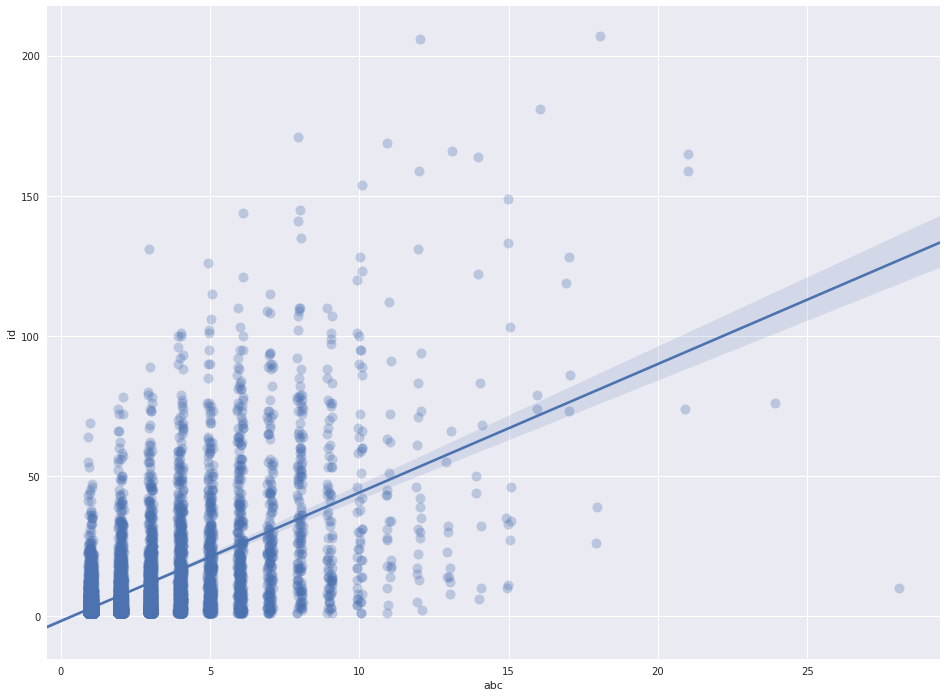

In [14]:
import seaborn as sns; sns.set(color_codes=True) 
import matplotlib.pyplot as plt 
sns.set(rc={"figure.figsize": (16, 12)}) 
ax = sns.regplot(x="abc", y="id", data=joinData,  x_jitter=.1, scatter_kws={"s": 100,  "alpha": 0.3}) 

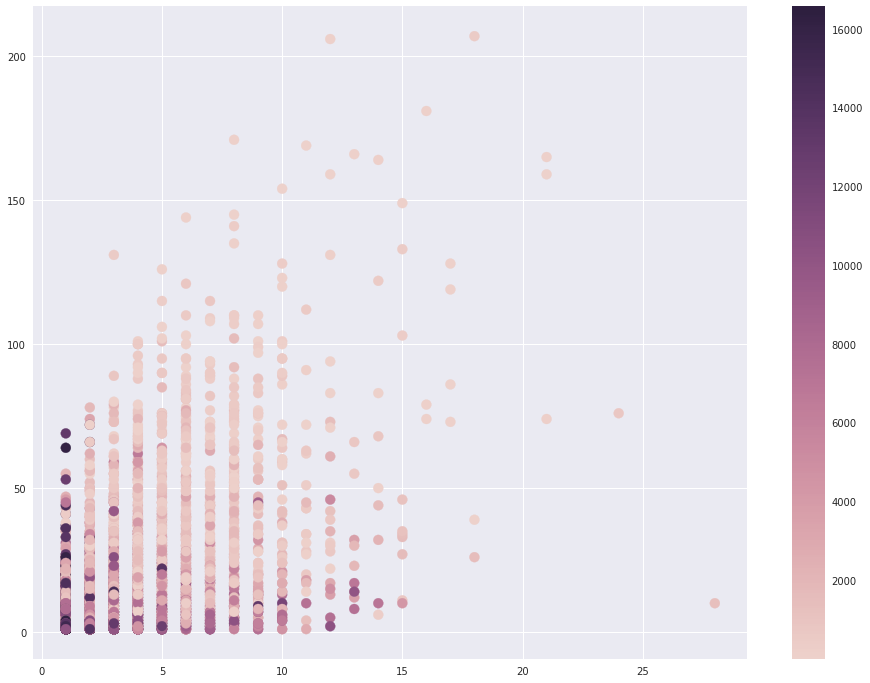

In [26]:
cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots()
points = ax.scatter(x="abc", y="id", c="tune_id", data=joinData,  s=100, cmap=cmap) 
f.colorbar(points)

In [195]:
jigdf = (tuneData.loc[tuneData['type']=='reel'])

In [196]:
notes = ['G,', 'A,', 'B,', 'C', 'D', 'E', 'F', 'G', 'A', 'B', 'c', 'd', 'e', 'f', 'g', 'a', 'b', 'c\'', 'd\''] 

In [197]:
rep = dict();

for n in notes:
    rep[n+"2"] = n * 2
    rep[n+"3"] = n * 3
    rep[n+"4"] = n * 4

In [198]:
rep = dict((re.escape(k), v) for k, v in rep.items())
pattern = re.compile("|".join(rep.keys()))

In [199]:
for index, row in jigdf.iterrows():
    row[0] = re.sub('(?:[{\"]{1,2}\w*[}\"]{1,2})', '', row[0]) 
    row[0] = re.sub('[^a-gA-G,:|\']', '', pattern.sub(lambda m: rep[re.escape(m.group(0))], row[0]))
    jigdf.set_value(index, 'abc1', row[0]) 

In [20]:
jigdf.head(3)

,abc,date,meter,mode,name,setting,tune,type,username,abc1
5,|: {g}A|{Gdc}d3/2f/2{g}A{Gdc}d2f|{g}f3/2g/2a{fg}f3/2e/2d| {g}c2{GdG}e{g}A3/2{d}c/2e|{g}e3/2f/2g{afg}f3/2e/2d|\r\n{gdc}d3/2f/2{g}A{Gdc}d2f|{g}f3/2g/2a{fg}f3/2e/2d|{g}c2{GdG}e{g}A3/2{d}c/2e|{Gdc}d3{gdc}d2:|\r\n|: {gf}g|{ag}a2f{Gdc}d2f|{g}f/2a3/2f{gfg}f3/2e/2d|{g}c2{GdG}e{g}A3/2{d}c/2e|{g}e3/2f/2g{afg}f3/2e/2d|\r\n{ag}a2f{Gdc}d2f|{g}f/2a3/2f{gfg}f3/2e/2d|{g}c2{GdG}e{g}A3/2{d}c/2e|{Gdc}d3{gdc}d2:|\r\n|: {g}A|{Gdc}d3{g}A3/2d/2f|{g}f/2a3/2f{gfg}f3/2e/2d|{gcd}c3{g}A3/2{d}c/2e|{g}e3/2f/2g{afg}f3/2e/2d|\r\n{gdc}d3{g}A3/2d/2f|{g}f/2a3/2f{gfg}f3/2e/2d|{g}c2{GdG}e{g}A3/2{d}c/2e|{Gdc}d3{gdc}d2:|\r\n|:{gf}g|a2{GdG}aA3/2d/2f|{g}f/2a3/2f{gfg}f3/2e/2d|{g}c2{GdG}e{g}A3/2{d}c/2e|{g}e3/2f/2g{afg}f3/2e/2d|\r\na2{GdG}aA3/2d/2f|{g}f/2a3/2f{gfg}f3/2e/2d|{g}c2{GdG}e{g}A3/2{d}c/2e|{Gdc}d3{gdc}d2:|,2007-04-15 06:56:09,6/8,Amixolydian,10th Bat Crossing Rhine,7078,7078,jig,gaitazampogna_32,|:A|dddfAddf|fffgafffed|cceAAAce|eeefgfffed|dddfAddf|fffgafffed|cceAAAce|ddddd:||:g|aafddf|faaaffffed|cceAAAce|eeefgfffed|aafddf|faaaffffed|cceAAAce|ddddd:||:A|dddAAAdf|faaaffffed|cccAAAce|eeefgfffed|dddAAAdf|faaaffffed|cceAAAce|ddddd:||:g|aaaAAAdf|faaaffffed|cceAAAce|eeefgfffed|aaaAAAdf|faaaffffed|cceAAAce|ddddd:|
6,d>fA d2 f | f>ga f>ed | c2 e A>ce | e>fg f>ed |\rd>fA d2 f | f>ga f>ed | c2 e A>ce | d3 d2 :|\ra2 f d2 f | f<af f>ed | c2 e A>ce | e>fg f>ed |\ra2 f d2 f | f<af f>ed | c2 e A>ce | d3 d2 :|\rd3 A>df | f<af f>ed | c3 A>ce | e>fg f>ed |\rd3 A>df | f<af f>ed | c2 e A>ce | d3 d2 :|\ra2 a A>df | f<a3f f>ed | c2 e A>ce | e>fg f>ed |\ra2 a A>df | f<a3f f>ed | c2 e A>ce | d3 d2 :|,2007-04-18 13:25:41,6/8,Amixolydian,10th Bat Crossing Rhine,18649,7078,jig,ceolachan,dfAddf|fgafed|cceAce|efgfed|dfAddf|fgafed|cceAce|ddddd:|aafddf|faffed|cceAce|efgfed|aafddf|faffed|cceAce|ddddd:|dddAdf|faffed|cccAce|efgfed|dddAdf|faffed|cceAce|ddddd:|aaaAdf|faaaffed|cceAce|efgfed|aaaAdf|faaaffed|cceAce|ddddd:|
7,d<fA d2 A | f>ga fed | c<eA c2 e | e>fg fed |\rd<fA d2 A | f>ga fed | c>ea g>ec | d3- d2 :|\ra<Af d2 A | f<af fed | c<eA c2 e | e>fg fed |\ra<Af d2 A | f<af fed | c>ea g>ec | d3- d2 :|\rd3 A>df | f<af fed | c<eA c2 e | e>fg fed |\rd3 A>df | f<af fed | c>ea g>ec | d3- d2 :|\ra<Aa A>df | f<af fed | c<eA c2 e | e>fg fed |\ra<Aa A>df | f<af fed | c>ea g>ec | d3- d2 :|,2007-04-18 14:05:40,6/8,Dmajor,10th Bat Crossing Rhine,18650,7078,jig,ceolachan,dfAddA|fgafed|ceAcce|efgfed|dfAddA|fgafed|ceagec|ddddd:|aAfddA|faffed|ceAcce|efgfed|aAfddA|faffed|ceagec|ddddd:|dddAdf|faffed|ceAcce|efgfed|dddAdf|faffed|ceagec|ddddd:|aAaAdf|faffed|ceAcce|efgfed|aAaAdf|faffed|ceagec|ddddd:|


In [21]:
pattern1 = re.compile(r'[|:]{0,2}(?:[a-gA-G][,\'\s]{0,2}){3}(?:[a-gA-G][,\'\s]{0,2}){3}[:|]{0,2}') 

In [22]:
for index, row in jigdf.iterrows():
    basic = ''
    i = 0 
    for match in re.findall(pattern1, row[9]) :
        basic = basic + re.sub('[^a-gA-G,\']', '', match) + "|" 
        i = i + 1
        if i >= 8:
            break
    jigdf.loc[index, 'basic'] = basic 

In [151]:
jigdf.drop('abc1', axis=1) 

,abc,date,meter,mode,name,setting,tune,type,username,basic
5,|: {g}A|{Gdc}d3/2f/2{g}A{Gdc}d2f|{g}f3/2g/2a{fg}f3/2e/2d| {g}c2{GdG}e{g}A3/2{d}c/2e|{g}e3/2f/2g{afg}f3/2e/2d|\r\n{gdc}d3/2f/2{g}A{Gdc}d2f|{g}f3/2g/2a{fg}f3/2e/2d|{g}c2{GdG}e{g}A3/2{d}c/2e|{Gdc}d3{gdc}d2:|\r\n|: {gf}g|{ag}a2f{Gdc}d2f|{g}f/2a3/2f{gfg}f3/2e/2d|{g}c2{GdG}e{g}A3/2{d}c/2e|{g}e3/2f/2g{afg}f3/2e/2d|\r\n{ag}a2f{Gdc}d2f|{g}f/2a3/2f{gfg}f3/2e/2d|{g}c2{GdG}e{g}A3/2{d}c/2e|{Gdc}d3{gdc}d2:|\r\n|: {g}A|{Gdc}d3{g}A3/2d/2f|{g}f/2a3/2f{gfg}f3/2e/2d|{gcd}c3{g}A3/2{d}c/2e|{g}e3/2f/2g{afg}f3/2e/2d|\r\n{gdc}d3{g}A3/2d/2f|{g}f/2a3/2f{gfg}f3/2e/2d|{g}c2{GdG}e{g}A3/2{d}c/2e|{Gdc}d3{gdc}d2:|\r\n|:{gf}g|a2{GdG}aA3/2d/2f|{g}f/2a3/2f{gfg}f3/2e/2d|{g}c2{GdG}e{g}A3/2{d}c/2e|{g}e3/2f/2g{afg}f3/2e/2d|\r\na2{GdG}aA3/2d/2f|{g}f/2a3/2f{gfg}f3/2e/2d|{g}c2{GdG}e{g}A3/2{d}c/2e|{Gdc}d3{gdc}d2:|,2007-04-15 06:56:09,6/8,Amixolydian,10th Bat Crossing Rhine,7078,7078,jig,gaitazampogna_32,dddfAd|fffgaf|cceAAA|eeefgf|dddfAd|fffgaf|cceAAA|aafddf|
6,d>fA d2 f | f>ga f>ed | c2 e A>ce | e>fg f>ed |\rd>fA d2 f | f>ga f>ed | c2 e A>ce | d3 d2 :|\ra2 f d2 f | f<af f>ed | c2 e A>ce | e>fg f>ed |\ra2 f d2 f | f<af f>ed | c2 e A>ce | d3 d2 :|\rd3 A>df | f<af f>ed | c3 A>ce | e>fg f>ed |\rd3 A>df | f<af f>ed | c2 e A>ce | d3 d2 :|\ra2 a A>df | f<a3f f>ed | c2 e A>ce | e>fg f>ed |\ra2 a A>df | f<a3f f>ed | c2 e A>ce | d3 d2 :|,2007-04-18 13:25:41,6/8,Amixolydian,10th Bat Crossing Rhine,18649,7078,jig,ceolachan,dfAddf|fgafed|cceAce|efgfed|dfAddf|fgafed|cceAce|aafddf|
7,d<fA d2 A | f>ga fed | c<eA c2 e | e>fg fed |\rd<fA d2 A | f>ga fed | c>ea g>ec | d3- d2 :|\ra<Af d2 A | f<af fed | c<eA c2 e | e>fg fed |\ra<Af d2 A | f<af fed | c>ea g>ec | d3- d2 :|\rd3 A>df | f<af fed | c<eA c2 e | e>fg fed |\rd3 A>df | f<af fed | c>ea g>ec | d3- d2 :|\ra<Aa A>df | f<af fed | c<eA c2 e | e>fg fed |\ra<Aa A>df | f<af fed | c>ea g>ec | d3- d2 :|,2007-04-18 14:05:40,6/8,Dmajor,10th Bat Crossing Rhine,18650,7078,jig,ceolachan,dfAddA|fgafed|ceAcce|efgfed|dfAddA|fgafed|ceagec|aAfddA|
12,"e^de age|d^cd g3|ABc B2 A|G3 z2d|\r\n|:d^cd edc|ded B3|d^cd edB|c3 z3|\r\nD^DE =F^FG|A2 B c2 ^c|d^cd ed=c|B3 z3|\r\nd^cd edc|ded B3|d^cd g2 f|e3 z3|\r\ne^de age|d^cd g3|ABc B2 A|1G3 z2 d:|2G3 z2 A||\r\nK:D\r\n|:d2 A e2 A|f3 d2 ^c|B^AB d2 B|A3 z2 A|\r\nd2 A e2 A|f3 d2 f|e2 B ^c2 d|e3 z2 A|\r\nd2 A e2 A|f3 d2 ^c|B2 ^d e2 f|g3 z3|\r\nB^AB d^cB|Adf a2 g|fed A2 ^c|1d3 z2 A:|2d3 z2 d||\r\nK:G\r\nd^cd edc|ded B3|d^cd edB|c3 z3|\r\nD^DE =F^FG|A2 B c2 ^c|d^cd ed=c|B3 z3|\r\nd^cd edc|ded B3|ded g2 f|e3 z3|\r\ne^de age|d^cd g3|ABc B2 A|G3 z2 =F|\r\nK:C\r\nE3 ^D2 E|C6|E^DE AGE|F6|\r\nD3 ^C2 D|B,6|G,A,B, CD^D|E6|\r\nE3 ^D2 E|C6|cBc d2 c|A6|\r\nA^GA cBA|G^FG c3|DEF E2 D| C3 d3|",2009-01-25 05:35:16,6/8,Gmajor,18-6 Two Step,9294,9294,jig,pcd,edeage|dcdggg|ABcBBA|dcdedc|dedBBB|dcdedB|DDEFFG|AABccc|
17,"|: ""Dm"" Ade f2 d | ""C"" cAA cAA | ""Dm"" Ade f2 f | ""Am"" eag ""Dm"" edd |\r\n""Dm"" Ade f2 d | ""C"" cAA cAA | ""Dm"" ~d3 ""C"" cAG | ""Dm"" FDD D3 :|\r\n|: ""Dm"" fdd fdd | ""Am"" eAA eAA | ""Dm"" Ade f2 f | ""Am"" eag ""Dm"" edd |\r\n""Dm"" fdd fdd | ""Am"" eAA eAA |""Dm"" ~d3 ""C"" cAG | ""Dm"" FDD D3 :|",2011-01-18 18:37:26,6/8,Dminor,249 To Wigton,10999,10999,jig,Edgar Bolton,Adeffd|cAAcAA|Adefff|eagedd|Adeffd|cAAcAA|dddcAG|FDDDDD|
24,D|:EDE FEF|GBG D2D|EcB AGE|{F}G2A- AFD|\r\nEDE FEF|GBG D2D|EcB AGE|1F2G- GzD:|2F2G- Gz2||\r\n|:~g3 agf|~g3 d(3B^cd|egf edc|BAG ABd|\r\n~g3 agf|~g3 d(3B^cd|egf edB-|Bgf edB|\r\ncBA ~B3|ced BAB|cBc eag|1f2g- gz2:|2f2g- gzD||,2005-12-12 10:36:29,6/8,Gmajor,"30 Year, The",5304,5304,jig,flamin fiddler,EDEFEF|GBGDDD|EcBAGE|GGAAFD|EDEFEF|GBGDDD|EcBAGE|gggagf|
25,|:~g3 agf|g2 g d(3B^cd|egf edc|BAG ABd|\r~g3 agf|g g2 d(3B^cd|egf edB-|Bgf edB|\rcBA ~B3|ced BAB|cBc eag|1f2g- gz2:|2f2g- gzD||,2005-12-14 04:32:52,6/8,Gmajor,"30 Year, The",17518,5304,jig,flamin fiddler,gggagf|gggdBc|egfedc|BAGABd|gggagf|gggdBc|egfedB|BgfedB|
26,DED GEG | ABA D2D | EcB AGE | FGA4 |\r\nDED GEG | ABA D2D | EcB AGE | FGG4 :|\r\ngfg agf | g3 d2d| egf edc | B

In [186]:
sample = jigdf[jigdf['name'].str.contains("Kesh, The")&jigdf['mode'].str.contains("Gmajor")]

In [187]:
sample.count() 

abc         8
date        8
meter       8
mode        8
name        8
setting     8
tune        8
type        8
username    8
abc1        8
basic       8
dtype: int64

In [188]:
df1 = sample['basic'].apply(lambda x: pd.Series(list(x)))

In [134]:
num = dict();

i = 0 
for n in notes:
    num[n] = i
    i = i + 1

In [121]:
num = dict((re.escape(k), v) for k, v in num.items())
pattern_num = re.compile("|".join(num.keys())) 

In [189]:
df1.replace(num, inplace=True)

In [190]:
print(df1)

       0  1  2   3  4  5  6   7   8   9 ...  46  47  48  49  50  51  52  53  \
14690  7  7  7  7   8  9  |  8   8   8  ...  11  11  |   9   8   6   7   7    
14692  7  7  7  7   8  9  |  8   8   8  ...  11  9   |   9   9   9   11  9    
14696  7  7  4  7   8  9  |  8   8   7  ...  11  9   |   9   9   8   7   7    
14697  7  7  7  7   7  8  |  8   8   8  ...  14  11  |   8   7   6   7   7    
14698  7  7  7  7   8  9  |  8   8   8  ...  11  9   |   10  8   6   7   7    
14699  9  7  7  11  7  7  |  12  14  12 ...  14  15  |   16  14  14  14  14   
14700  7  7  7  7   8  9  |  8   9   8  ...  11  9   |   9   9   9   11  9    
14701  7  7  7  7   8  9  |  8   8   8  ...  11  9   |   8   7   6   7   7    

       54  55  
14690  7   |   
14692  10  |   
14696  7   |   
14697  8   |   
14698  7   |   
14699  11  |   
14700  11  |   
14701  4   |   

[8 rows x 56 columns]


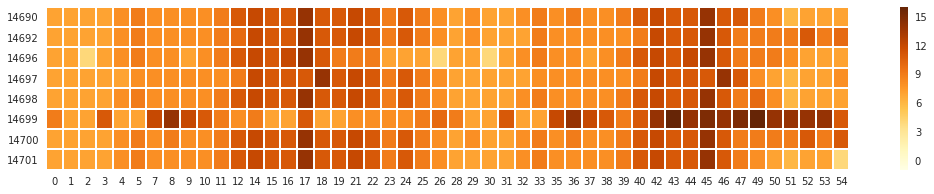

In [192]:
sns.set(rc={"figure.figsize": (18, 3)}) 
ax = sns.heatmap(df2, linewidths=1, cmap="YlOrBr", vmin=-1) 

In [191]:
df2 = df1.select_dtypes(['number']) 

In [138]:
df2

,0,1,2,3,4,5,7,8,9,10,...,39,42,43,44,45,50,52,56,57,60
4456,10,10,10,9,8,7,8,7,5,4,...,7,7,5,4,9,8,8,4.0,5.0,9.0
4457,10,9,8,15,13,15,16,15,14,12,...,11,7,9,11,14,8,8,NaN,NaN,NaN
4459,10,9,8,9,8,7,8,7,5,4,...,9,8,8,5,5,9,8,NaN,NaN,NaN
4460,10,10,8,9,8,7,8,7,5,4,...,9,8,7,8,5,9,15,NaN,NaN,NaN
4461,8,7,5,4,9,7,8,7,8,5,...,11,11,12,14,15,10,10,11.0,12.0,16.0
4462,10,10,10,9,8,7,8,7,5,4,...,15,15,13,14,12,8,8,6.0,7.0,11.0
4464,10,9,8,9,8,7,8,7,5,4,...,11,7,5,4,9,8,8,5.0,3.0,10.0
4466,10,9,8,9,8,7,8,7,5,4,...,7,7,5,4,9,8,8,5.0,7.0,4.0
12959,8,8,8,9,8,7,8,8,8,15,...,15,14,13,12,12,15,15,NaN,NaN,NaN


In [193]:
df3=df2.apply(pd.Series.value_counts).fillna(0)

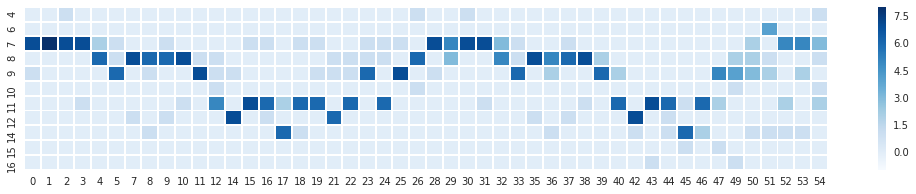

In [194]:
sns.set(rc={"figure.figsize": (18, 3)}) 
ax = sns.heatmap(df3, linewidths=1, cmap="Blues", vmin=-1) 

In [54]:
df3

,0,1,2,3,4,5,7,8,9,10,...,44,45,46,47,49,50,51,52,53,54
4,7.0,2.0,7.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,7.0,7.0
5,0.0,5.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,...,7.0,0.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,5.0,7.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
df1 = jigdf['basic'].apply(lambda x: pd.Series(list(x)))

In [102]:
df1.replace(num, inplace=True)

In [109]:
df2 = df1.select_dtypes(['number']) 

In [104]:
df3=df2.apply(pd.Series.value_counts).fillna(0)